导入相关包

In [8]:
import numpy as np
import matplotlib.pyplot as plt

写入目标函数

In [9]:
def testFun(x, y):
    t = 4.0*x - 1.0*y
    t1 = x - 1.0
    z = np.power(t, 2) + np.power(t1, 4)
    return z

求函数的梯度

In [10]:
def gradTestFun(x, y):
    delta_x = 1e-6      #x方向差分小量
    delta_y = 1e-6      #y方向差分小量
    grad_x = (testFun(x+delta_x, y)-testFun(x-delta_x, y))/(2.0*delta_x)
    grad_y = (testFun(x, y+delta_y)-testFun(x, y-delta_y))/(2.0*delta_y)
    grad_xy = np.array([grad_x, grad_y])
    return grad_xy

采用牛顿法，精确线性搜索确定移动步长

In [11]:
def getStepLengthByNewton(array_xy, array_d):
    a0 = 1.0           #初始猜测值
    e0 = 1e-6          #退出搜索循环的条件
    delta_a = 1e-6     #对a作差分的小量
    while(1):
        new_a = array_xy + a0*array_d
        new_a_l = array_xy + (a0-delta_a)*array_d
        new_a_h = array_xy + (a0+delta_a)*array_d
        diff_a0 = (testFun(new_a_h[0], new_a_h[1]) - testFun(new_a_l[0], new_a_l[1]))/(2.0*delta_a)
        if np.abs(diff_a0) < e0:
            break
        ddiff_a0 = (testFun(new_a_h[0], new_a_h[1]) + testFun(new_a_l[0], new_a_l[1]) - 2.0*testFun(new_a[0], new_a[1]))/(delta_a*delta_a)
        a0 = a0 - diff_a0/ddiff_a0
    return a0

可视化

In [12]:
def plotResult(array_xy_history):
    x = np.linspace(-1.0, 4.0, 100)
    y = np.linspace(-4.0, 8.0, 100)
    X, Y = np.meshgrid(x, y)
    Z = testFun(X, Y)
    plt.figure(dpi=300)
    plt.xlim(-1.0, 4.0)
    plt.ylim(-4.0, 8.0)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.contour(X, Y, Z, 40)
    plt.plot(array_xy_history[:,0], array_xy_history[:,1], marker='.', ms=10)
    xy_count = array_xy_history.shape[0]
    for i in range(xy_count):
        if i == xy_count-1:
            break
        dx = (array_xy_history[i+1][0] - array_xy_history[i][0])*0.6
        dy = (array_xy_history[i+1][1] - array_xy_history[i][1])*0.6
        plt.arrow(array_xy_history[i][0], array_xy_history[i][1], dx, dy, width=0.1)

使用CG算法优化，用FR公式计算组合系数

In [13]:
def mainFRCG():
    ls_xy_history = []                           #存储初始坐标的迭代结果
    xy0 = np.array([4.0, -2.0])                   #初始点
    grad_xy = gradTestFun(xy0[0], xy0[1])
    d = -1.0*grad_xy                             #初始搜索方向
    e0 = 1e-6                                    #迭代退出条件
    xy = xy0
    while(1):
        ls_xy_history.append(xy)
        grad_xy = gradTestFun(xy[0], xy[1])
        tag_reach = np.abs(grad_xy) < e0
        if tag_reach.all():
            break
        step_length = getStepLengthByNewton(xy, d)
        xy_new = xy + step_length*d
        grad_xy_new = gradTestFun(xy_new[0], xy_new[1])
        b = np.dot(grad_xy_new, grad_xy_new)/np.dot(grad_xy, grad_xy)       #根据FR公式计算组合系数
        d = b*d - grad_xy_new
        xy = xy_new
    array_xy_history = np.array(ls_xy_history)
    plotResult(array_xy_history)
    return array_xy_history

主函数

array([[ 4.        , -2.        ],
       [-0.16199807, -1.40542885],
       [ 0.17051812,  1.02652271],
       ...,
       [ 1.00679049,  4.02716062],
       [ 1.00678851,  4.02717172],
       [ 1.00679032,  4.02716148]])

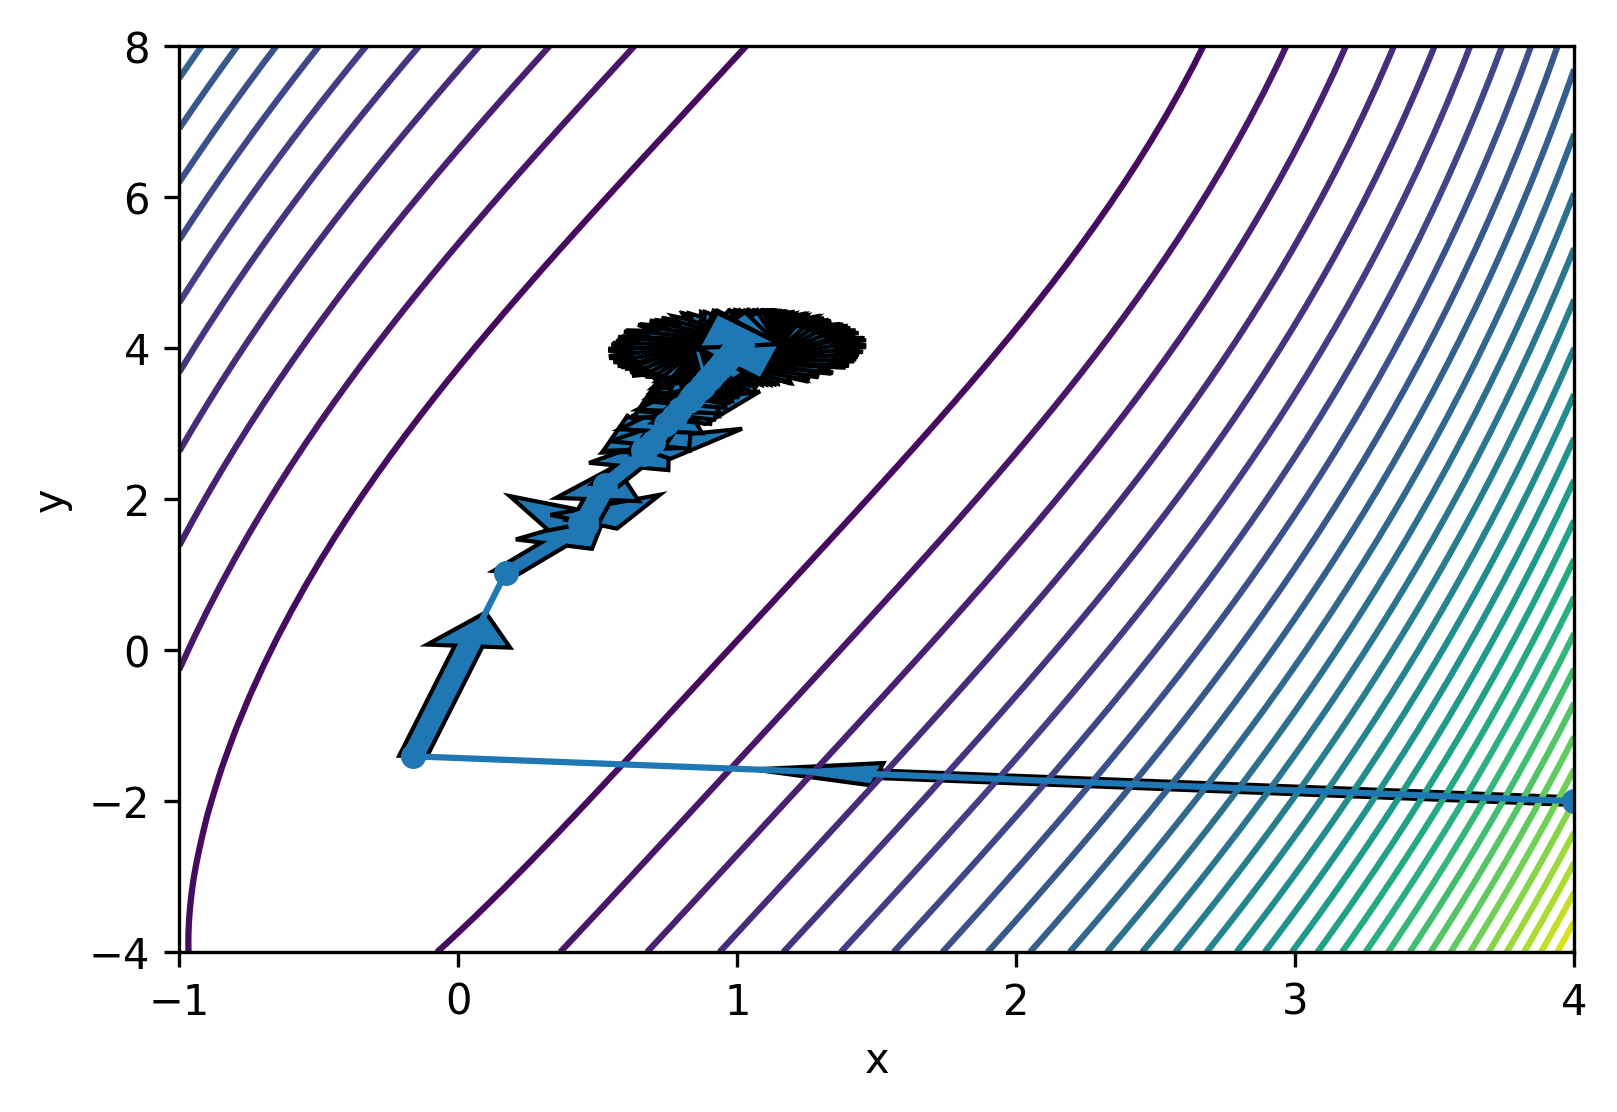

In [14]:
mainFRCG()